### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [64]:
pd.set_option('display.max_columns', None)
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5131,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Student,$50000 - $62499,NaN,less1,never,4~8,less1,never,1,0,0,0,1,0
9505,Work,Alone,Rainy,55,7AM,Carry out & Take away,2h,Male,36,Married partner,1,Bachelors degree,Computer & Mathematical,$100000 or More,NaN,less1,never,1~3,less1,less1,1,1,0,1,0,0
12547,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,26,Married partner,0,Bachelors degree,Office & Administrative Support,$50000 - $62499,NaN,never,less1,1~3,1~3,never,1,1,0,0,1,0
9540,Home,Alone,Sunny,80,6PM,Carry out & Take away,1d,Female,below21,Unmarried partner,0,Some college - no degree,Student,$100000 or More,NaN,less1,1~3,less1,1~3,less1,1,0,0,0,1,1
12433,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,1,Some college - no degree,Protective Service,$100000 or More,NaN,1~3,less1,4~8,1~3,4~8,1,0,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
# to find missing data we run the .isnull() command with the .sum() command:

data.isnull().sum().sort_values()

# we see most columns are full but there's a few with many items missing. In particular, the "car" column is almost entirely empty- this makes us question whether that column is useful at all. 

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [70]:
# replaced with binary, 1= yes car, 0= no car

data["car"].fillna(0)

0        0
1        0
2        0
3        0
4        0
        ..
12679    0
12680    0
12681    0
12682    0
12683    0
Name: car, Length: 12684, dtype: object

4. What proportion of the total observations chose to accept the coupon? 



In [49]:
data["Y"].value_counts(normalize = True)

# by running the .value_counts() method on the "Y" column, we can see that the coupons were used 56% of the time, and unused 43% of the time.

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64

5. Use a bar plot to visualize the `coupon` column.

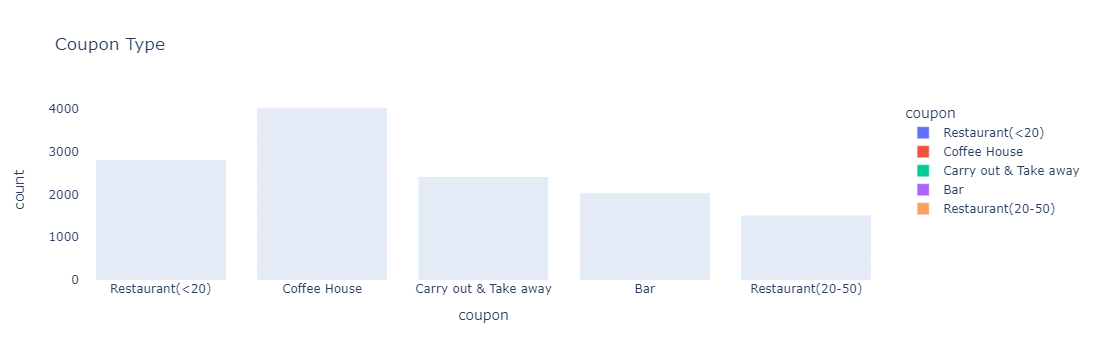

In [39]:
#help(px.bar)
fig = px.bar(data, x="coupon", title="Coupon Type", color="coupon", opacity=1)
fig.update_layout( plot_bgcolor='white')

6. Use a histogram to visualize the temperature column.

In [29]:
pd.to_numeric(data["temperature"])

0        55
1        80
2        80
3        80
4        80
         ..
12679    55
12680    55
12681    30
12682    30
12683    80
Name: temperature, Length: 12684, dtype: int64

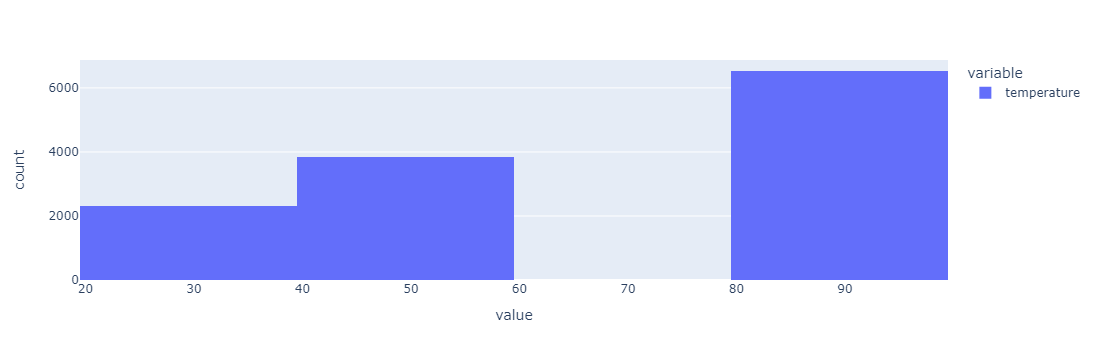

In [32]:
px.histogram(data["temperature"])

In [ ]:
# based on the histogram of the temperature above we can see that the coupons were handed out either in cold weather (60F or less) or hot weather (80F or more) but never in between.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [104]:
pd.set_option('display.max_columns', None)
bar_df = data.query('coupon == "Bar"')
bar_df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
8163,Home,Alone,Sunny,80,6PM,Bar,2h,Female,46,Unmarried partner,0,Graduate degree (Masters or Doctorate),Unemployed,$100000 or More,NaN,never,less1,less1,1~3,less1,1,0,0,1,0,0
6839,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Management,$50000 - $62499,NaN,never,less1,less1,1~3,less1,1,1,1,0,1,0
825,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,1,Some college - no degree,Computer & Mathematical,$62500 - $74999,NaN,never,1~3,4~8,1~3,1~3,1,1,1,0,1,0
11261,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,31,Single,0,Some college - no degree,Transportation & Material Moving,$50000 - $62499,NaN,1~3,4~8,4~8,4~8,1~3,1,1,0,0,1,1
9242,Work,Alone,Sunny,30,7AM,Bar,1d,Male,50plus,Married partner,1,Some college - no degree,Office & Administrative Support,$62500 - $74999,NaN,1~3,never,1~3,1~3,less1,1,1,0,1,0,1


In [105]:
bar_df.groupby("age")[["Y"]].value_counts()

age      Y
21       1    211
         0    206
26       0    202
         1    193
31       0    214
         1    125
36       0    146
         1     63
41       0    101
         1     77
46       0     71
         1     38
50plus   0    199
         1     84
below21  0     51
         1     36
Name: count, dtype: int64

2. What proportion of bar coupons were accepted?


In [61]:
bar_df["Y"].value_counts(normalize= True)

# within the bar coupons, 41% were accepted, and 58% were not. 

Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [68]:
# to figure this out, i ran a groupby() function and we found the proportion of yes and no's but we ran into the problem of too many categories. we need to group the categories.
bar_df.groupby("Bar")[["Y"]].value_counts(normalize = True)


Bar    Y
1~3    1    0.647355
       0    0.352645
4~8    1    0.780000
       0    0.220000
gt8    1    0.734694
       0    0.265306
less1  0    0.556140
       1    0.443860
never  0    0.812048
       1    0.187952
Name: proportion, dtype: float64

In [77]:
# we create a list to hold all the options that are under 3 drinks per month and query that list
list_under_3=["1~3", "less1", "never"]
list_over_3=["4~8","gt8"]

bar_df.query('Bar in @list_under_3')[["Y"]].value_counts(normalize = True)

# we see that of people that have 3 or less drinks/month, 37% accepted the bar coupon. 

Y
0    0.629382
1    0.370618
Name: proportion, dtype: float64

In [76]:
# we create a list to hold all the options of 3+ drinks per month and query that list
list_over_3=["4~8","gt8"]
bar_df.query('Bar in @list_over_3')[["Y"]].value_counts(normalize = True)

# we see that of people that have 4 or more drinks/month, 77% accepted the bar coupon. 

Y
1    0.768844
0    0.231156
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [108]:
more_than_once=["1~3","4~8","gt8"]
over_25=["26","31","36","41","46","50plus"]

bar_df.query('Bar in @ more_than_once' and 'age in @ over_25' )[["Y"]].value_counts(normalize = True)

# drivers who are over 25 and go more than 1x/month accepted the coupon at a rate of 38%

Y
0    0.616656
1    0.383344
Name: proportion, dtype: float64

In [110]:
more_than_once=["1~3","4~8","gt8"]
over_25=["26","31","36","41","46","50plus"]

bar_df.query('Bar not in @ more_than_once' and 'age not in @ over_25' )[["Y"]].value_counts(normalize = True)

# for all other drivers who were NOT over 25 and didnt go to the bar at least 1x/month, the acceptance rate was 49%.

Y
0    0.509921
1    0.490079
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [115]:
# column for children present is called "has_children"
# column for occupations is called "occupation"

# first im going to run a groupby() just to see what are the options inside of each othese columns

bar_df.groupby("passanger")[["Y"]].value_counts()

passanger  Y
Alone      0    711
           1    489
Friend(s)  1    188
           0    149
Kid(s)     0    163
           1     43
Partner    0    167
           1    107
Name: count, dtype: int64

In [114]:
bar_df.groupby("occupation")[["Y"]].value_counts()

occupation                                 Y
Architecture & Engineering                 1     18
                                           0      9
Arts Design Entertainment Sports & Media   0     67
                                           1     33
Building & Grounds Cleaning & Maintenance  0      5
                                           1      2
Business & Financial                       0     48
                                           1     41
Community & Social Services                0     31
                                           1     13
Computer & Mathematical                    0    145
                                           1     87
Construction & Extraction                  1     13
                                           0     11
Education&Training&Library                 0    100
                                           1     40
Farming Fishing & Forestry                 0      5
                                           1      4
Food Preparation & 

In [116]:
#Use the same process to compare the acceptance rate between 
#drivers who go to bars more than once a month and had passengers that 
#were not a kid and had occupations other than farming, fishing, or forestry.

# list of drivers who go more than once:
more_than_once=["1~3","4~8","gt8"]

# list for passengers that were a kid:
passanger = ["Kid(s)"]

# list of other jobs
farming_jobs=["Farming Fishing & Forestry"]

bar_df.query('Bar not in @ more_than_once' and 'passanger is not "Kid(s)"' and 'occupation not in @ farming_jobs')[["Y"]].value_counts(normalize = True)

Y
0    0.590139
1    0.409861
Name: proportion, dtype: float64

In [ ]:
# of those people above, 41% accepted the coupon. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [117]:
bar_df.groupby("maritalStatus")[["Y"]].value_counts()

maritalStatus      Y
Divorced           0     57
                   1     18
Married partner    0    592
                   1    290
Single             1    361
                   0    300
Unmarried partner  0    227
                   1    151
Widowed            0     14
                   1      7
Name: count, dtype: int64

In [132]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed 
widowed= ["Widowed"]

bar_df.query('Bar not in @ more_than_once' and 'passanger is not "Kid(s)"' and 'maritalStatus not in @ widowed')[["Y"]].value_counts(normalize = True)

# this group accepted the coupon at a rate of 41%

Y
0    0.589178
1    0.410822
Name: proportion, dtype: float64

In [134]:
# - go to bars more than once a month and are under the age of 30 *OR*

over_30=["31","36","41","46","50plus"]

bar_df.query('Bar not in @ more_than_once' and 'age in @ over_30')[["Y"]].value_counts(normalize = True)

# this group accepted the cupon at a rate of 34%

Y
0    0.653846
1    0.346154
Name: proportion, dtype: float64

In [135]:
#go to cheap restaurants more than 4 times a month and income is less than 50K. 

# column name: RestaurantLessThan20
# column name: income

# we need to look inside the relevant columns to find the categories and make a proper list we can query. 

bar_df.groupby("RestaurantLessThan20")[["Y"]].value_counts()

RestaurantLessThan20  Y
1~3                   0    530
                      1    348
4~8                   0    326
                      1    242
gt8                   0    101
                      1     85
less1                 0    203
                      1    122
never                 0     19
                      1     18
Name: count, dtype: int64

In [136]:
bar_df["income"].value_counts()

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64

In [137]:
#go to cheap restaurants more than 4 times a month and income is less than 50K. 

# column name: RestaurantLessThan20

cheap_eats_morethanfour = ["4~8","gt8"]

# column name: income

income_less_50k = ["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"]

bar_df.query('RestaurantLessThan20 in @ cheap_eats_morethanfour' and 'income in @ income_less_50k')[["Y"]].value_counts(normalize = True)

# of this group, 41% accepted the coupon.

Y
0    0.583815
1    0.416185
Name: proportion, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
The overall acceptance of bar coupons seems to hover at about ~40%, however this skyrockets to 70% when you filter by people who already have 3+ drinks per month

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
Im gonna explore if people that have a college education accepted coupons to coffee places at a higher rate than less educated people.

In [138]:
# finding the values of the education column
data["education"].value_counts()

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64

In [141]:
# finding the values of the coupon column
data["coupon"].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [145]:
# creating a new dataframe only for the coffee coupon category
coffee_df = data[(data["coupon"]== "Coffee House")]
coffee_df.sample(4)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3096,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$87500 - $99999,Mazda5,never,less1,1~3,1~3,less1,1,1,0,0,1,1
11202,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,0,Bachelors degree,Student,$12500 - $24999,NaN,less1,gt8,gt8,gt8,less1,1,1,0,0,1,0
3603,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Single,0,Bachelors degree,Retired,$87500 - $99999,NaN,never,less1,less1,1~3,less1,1,0,0,0,1,0
623,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Married partner,1,Some college - no degree,Student,$25000 - $37499,NaN,never,gt8,1~3,gt8,1~3,1,1,0,0,1,0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Some college - no degree'),
  Text(1, 0, 'Bachelors degree'),
  Text(2, 0, 'Associates degree'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(5, 0, 'Some High School')])

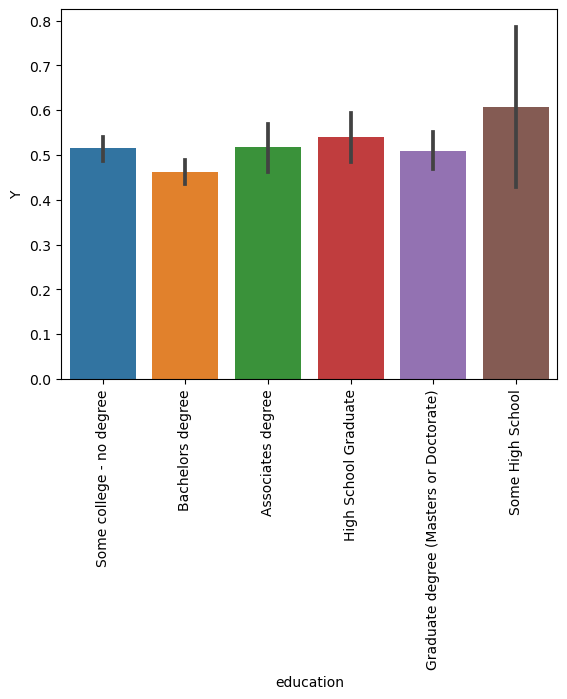

In [149]:
# graphing the rate of acceptance of coupon to coffee house by education level
sns.barplot(data=coffee_df, x="education", y="Y")
plt.xticks(rotation=90)

In [ ]:
graph above seems interesting and seems to point against my initial hypothesis (more education = more coffee).